In [1]:
%pip install SciencePlots
%pip install sklearn

from functools import reduce
from statistics import mean, stdev, mode, quantiles
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])

import re
import pandas as pd
from os import walk
import numpy as np
import matplotlib
import os

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# /usr/bin/env TS_NODE_PROJECT=tsconfig.json 'OFF-HFC_LOGGING={"debug":"console","info":"console"}' 'NODE_OPTIONS=--require /home/rafaelapb/.vscode-server-insiders/bin/4589815e4849499c67125ff68563fa102646b869/extensions/ms-vscode.js-debug/src/bootloader.bundle.js --inspect-publish-uid=http' 'VSCODE_INSPECTOR_OPTIONS={"inspectorIpc":"/tmp/node-cdp.33739-1.sock","deferredMode":false,"waitForDebugger":"","execPath":"/home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node","onlyEntrypoint":false,"autoAttachMode":"always","mandatePortTracking":true,"fileCallback":"/tmp/node-debug-callback-10ce8a101bff4e7a"}' /home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node --require ts-node/register --async-stack-traces packages/cactus-plugin-cc-tx-visualization/src/test/typescript/integration/cctxviz-persist-cross-chain-log.test.ts > packages/cactus-plugin-cc-tx-visualization/src/test/typescript/csv/out.txt
path = os.getcwd()
parent = os.path.dirname(path)
print(parent)
test_result_path = parent + "/test-results/"
NUMBER_TESTS = 30

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(test_result_path)



#(.)*-dummy-\d+.out captures:
# cctxviz-generate-use-case-dummy-1.out and cctxviz-generate-use-case-dummy-58.out

#(.)*-dummy-\d+-events-\d+.out captures
#cctxviz-generate-use-case-dummy-60-events-1.out and cctxviz-generate-use-case-dummy-60-events-97.out
def get_all_files(path,regex):
    filenames = []
    for _, _, filenames in sorted(walk(path)):
        break
    #regex all out: .*\.out
    # for dummy use case: (.)*-dummy-\d.out
    filenames = [i for i in filenames if re.match(regex, i)]
    return filenames


/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main
['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9013', '--control=9011', '--hb=9010', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"08b47fa9-3174-4e29-b05b-50f5f7c0533b"', '--shell=9012', '--transport="tcp"', '--iopub=9014', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-4505mNpNGklzTnQ2.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/test-results/


In [3]:
def exists (element):
    if (element):
        return True
    else:
        return False
            
            # Load out file and puts variables in dict
files = get_all_files(test_result_path, "dummy-use-case-6-(.)*-\d+.out")
entries = len(files) / 2
print(f"found {len(files)} matches")
metric_dict = dict()

for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict.get(key):
            metric_dict[key].append(value)
        else: 
            metric_dict[key] = [value]

#print("the metric dictionary is")
#print(metric_dict)
reduced_metric_dict = dict()
#print(metric_dict.values())
#reduced_metric_dict = reduce(lambda x, list: x + mean(list), metric_dict.values(),0)       

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict:
        metric_dict[element] = metric_dict[element][TO_SKIP_EACH_SIDE:]
        metric_dict[element] = metric_dict[element][:len(metric_dict[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict:
    data_container = {
        "label": element,
        "mean": round(mean(map(lambda x: float(x), metric_dict[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict[element])),
    }
    reduced_metric_dict[element] = data_container
print(reduced_metric_dict)
print(reduced_metric_dict.values())
#print(reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean'])



    



found 100 matches
{'EVAL-ccModel-DUMMY': {'label': 'EVAL-ccModel-DUMMY', 'mean': 83.51, 'stdev': 1.95, 'mode': 83.18, 'quantiles': [82.08500000000001, 83.06, 84.05000000000001]}, 'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'label': 'EVAL-SETUP-INIT-RABBIT-MQ-SERVER', 'mean': 1391.6, 'stdev': 83.03, 'mode': 1358.0, 'quantiles': [1357.75, 1370.5, 1403.0]}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'label': 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR', 'mean': 1.43, 'stdev': 0.57, 'mode': 1.0, 'quantiles': [1.0, 1.0, 2.0]}, 'EVAL-testFile-SETUP-INFRA': {'label': 'EVAL-testFile-SETUP-INFRA', 'mean': 1397.53, 'stdev': 83.06, 'mode': 1363.0, 'quantiles': [1363.0, 1377.5, 1408.25]}, 'EVAL-testFile-SEND-MESSAGES': {'label': 'EVAL-testFile-SEND-MESSAGES', 'mean': 0.47, 'stdev': 0.51, 'mode': 0.0, 'quantiles': [0.0, 0.0, 1.0]}, 'EVAL-testFile-POLL': {'label': 'EVAL-testFile-POLL', 'mean': 3030.27, 'stdev': 8.94, 'mode': 3026.0, 'quantiles': [3026.0, 3028.5, 3031.0]}, 'EVAL-plugin-cc-

In [4]:
mapper = {
    # - Initialize Infrastructure (RabbitMQ server, RabbitMQ client, Test ledgers, Connectors), + init cctxviz on test file
    'EVAL-testFile-SETUP-INFRA': 'Infrastructure Setup',

    # send a rabbit mq message or call a modified connector
    'EVAL-testFile-SEND-MESSAGES': 'Emit Local Transactions',

    # capture rabbit mq messages; can be subdivided see next 2 entries
    'EVAL-testFile-POLL': 'Poll Transaction Receipts',

    # issue tx and send to rabbit mq - fabric/besu
    'EVAL-PluginLedgerConnectorFabric-ISSUE-TRANSACTION': 'Fabric Transaction (modified)',
    'EVAL-PluginLedgerConnectorBesu-ISSUE-TRANSACTION': 'Besu Receipt (modified)',
    
    # transform raw receipt into fabric/besu receipt
    'EVAL-PluginLedgerConnectorFabric-GENERATE-AND-CAPTURE-RECEIPT': 'Create Fabric Receipt',
    'EVAL-PluginLedgerConnectorBesu-GENERATE-AND-CAPTURE-RECEIPT': 'Create Besu Receipt',

    # runs txReceiptToCrossChainEventLogEntry
    'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': 'Create CC Event',

    # runs aggregateCcTx
    'EVAL-testFile-AGGREGATE-CCTX': "Create CC-Tx",

    'EVAL-ccModel-DUMMY': "Create CC-Model"
}



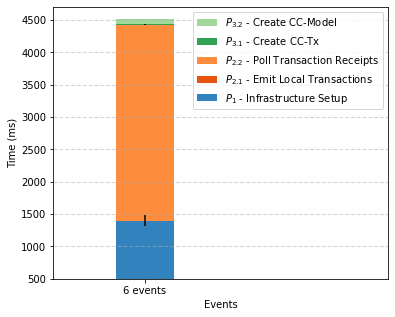

In [5]:
plt.rcParams.update(plt.rcParamsDefault)

width = 1.9 # the width# of the bars: can also be len(x) sequence
#label = ["Baseline End-to-end CC-Model Generation"]
label = ["6 events"]
plt.rcParams["font.size"] = "12"
fig, ax = plt.subplots(figsize=[6, 5])

viridis = plt.cm.get_cmap('tab20c')
#viridis.colors = viridis.colors[::-1]

phase_1 = reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean']
phase_1_stdev = reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['stdev']

phase_2 = reduced_metric_dict['EVAL-testFile-SEND-MESSAGES']['mean']
phase_2_stdev = reduced_metric_dict['EVAL-testFile-SEND-MESSAGES']['stdev']

phase_3 = reduced_metric_dict['EVAL-testFile-POLL']['mean']
phase_3_stdev = reduced_metric_dict['EVAL-testFile-POLL']['stdev']
phase_3_label = mapper['EVAL-testFile-POLL']

# merged phases 4 and 5
phase_4 = reduced_metric_dict['EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT']['mean']
phase_4_stdev = reduced_metric_dict['EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT']['stdev']
phase_4_label = mapper['EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT']
phase_5 = reduced_metric_dict['EVAL-testFile-AGGREGATE-CCTX']['mean']
phase_5_stdev = reduced_metric_dict['EVAL-testFile-AGGREGATE-CCTX']['stdev']
phase_5_label = mapper['EVAL-testFile-AGGREGATE-CCTX']

phase_6 = reduced_metric_dict['EVAL-ccModel-DUMMY']['mean']
phase_6_stdev = reduced_metric_dict['EVAL-ccModel-DUMMY']['stdev']
phase_6_label = mapper['EVAL-ccModel-DUMMY']

ax.bar(label, phase_1, width, yerr=phase_1_stdev,
           bottom=None,
           color=viridis.colors[0],
           label='$P_1$ - ' + mapper['EVAL-testFile-SETUP-INFRA'])

ax.bar(label, phase_2, width, yerr=phase_2_stdev,
           bottom=phase_1,
           color=viridis.colors[4],
           label='$P_{2.1}$ - ' + mapper['EVAL-testFile-SEND-MESSAGES'])

ax.bar(label, phase_3, width, yerr=phase_3_stdev,
           bottom=phase_1 + phase_2,
           color=viridis.colors[5],
           label='$P_{2.2}$ - ' + phase_3_label)

#ax.bar(label, phase_4, width, yerr=phase_4_stdev,
#           bottom=phase_1 + phase_2 + phase_3,
#           color=viridis.colors[4],
#           label=phase_4_label)

ax.bar(label, (phase_4 + phase_5), width, yerr=phase_4_stdev + phase_5_stdev,
           bottom=phase_1 + phase_2 + phase_3,
           color=viridis.colors[8],
           label='$P_{3.1}$ - ' + phase_5_label)

ax.bar(label, phase_6, width, yerr=phase_6_stdev,
           bottom=phase_1 + phase_2 + phase_3 + phase_4 + phase_5,
           color=viridis.colors[10],
           label='$P_{3.2}$ - ' + phase_6_label)



#ax.bar("nova", 1111, width, yerr=0,
#            align="edge",
#           bottom=None,
##           color=viridis.colors[17],
 #          label=mapper['EVAL-testFile-SETUP-INFRA'])

customScale = np.array([500,1000,1500,2000,2500,3000,3500,4000])


textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio



ax.set_ylabel('Time (ms)')
ax.set_xlabel('Events')

ax.set_xlim(-3, 8)
ax.set_ylim(500,4700)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper right')
#ax.set_title('Implementation performance depending on Access Control Policies')
ax.grid(linestyle='--', linewidth=1.1, axis='y', alpha=0.5)




fig.savefig('../test-results/plots/dummy-baseline.pdf', dpi=300, bbox_inches='tight')
fig.savefig('../test-results/plots/dummy-baseline.png', dpi=300, bbox_inches='tight')


[  0   6  65 661]


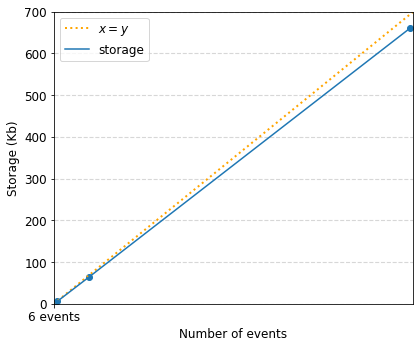

In [9]:

from sklearn.linear_model import LinearRegression


storage_values = np.array([789,6789,67275,677481,6893487])
storage_values_kb = storage_values // 1024
print (storage_values_kb[:-1])

events_number = np.array([6,60,600,6000,60000])

x = events_number[:-1]
y = storage_values_kb[:-1]
x_baseline = np.linspace(0,6050)
y_baseline = np.linspace(0,700)

model = LinearRegression()
model.fit(x.reshape(-1,1), y)

y_new = model.predict(x[:, np.newaxis])
#plt.plot(x, y_new)

plt.plot(x_baseline, y_baseline, ':', linewidth=2, color='orange')
plt.legend(['$x = y$'])

plt.plot(x,y)
plt.scatter(x,y)
plt.legend(['$x = y$', "storage"],loc ="upper left")

plt.xlabel("Number of events")
plt.ylabel("Storage (Kb)")
plt.xlim(0, 6050)
plt.ylim(0,700)


plt.savefig('../test-results/plots/dummy-baseline-storage.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../test-results/plots/dummy-baseline-storage.png', dpi=300,bbox_inches='tight')
plt.tight_layout()

plt.show()





AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

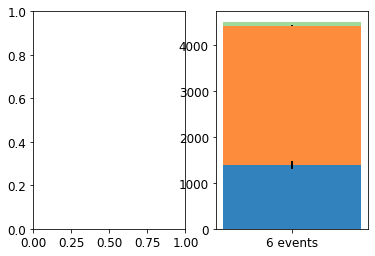